# <p style='text-align: center; '>IRIS FLOWER CLASSIFICATION</p>

The objective of the project is to develop a model that can classify iris flower into different species based on their sepal and petal measurements.
* The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. 

* we have to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.


## Importing libraries

We first imports all essential Python packages which are used for iris flower classification.

In [163]:
# importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Loading the data

The dataset we are going to use is from a CSV file named "iris.csv". The dataset contains the Sepal Length, Sepal Width, 	Petal Length, Petal Width and Species.

In [164]:
# Loading dataset from the csv file
iris=pd.read_csv("iris.csv")

## Exploring data

The initial data exploration is used to take a look at the dataset for its better understanding

In [165]:
# display first few rows of dataframe
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [166]:
# shape of data
print(iris.shape)

(150, 6)


In [168]:
# describing the data
print(iris.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [169]:
#Checking for null values in dataset
print(iris.isna().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [200]:
# displays information about the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [170]:
# counting the number of occurrences of the 'versicolor' species in dataset.
a= len(iris[iris['Species'] == 'Iris-versicolor'])
print("The no of Versicolor in dataset are:",a)

The no of Versicolor in dataset are: 50


In [171]:
# counting the number of occurrences of the 'virginica' species in dataset.
b = len(iris[iris['Species'] == 'Iris-virginica'])
print("The no of Virginica in Dataset are:",b)

The no of Virginica in Dataset are: 50


In [180]:
# counting the number of occurrences of the 'setosa' species in dataset.
n2 = len(iris[iris['Species'] == 'Iris-setosa'])
print("The no of Setosa in Dataset are:",n2)

The no of Setosa in Dataset are: 50


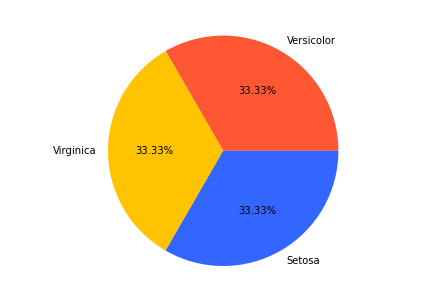

In [202]:
# creates a pie chart with 'Versicolor', 'Virginica', and 'Setosa' labels, displaying their respective percentages.
fg = plt.figure()
axs = fg.add_axes([0,0,1,1])
axs.axis('equal')
colors = ['#FF5733', '#FFC300', '#3366FF']
l = ['Versicolor','Virginica', 'Setosa',]
s = [50,50,50]
axs.pie(s, labels = l,autopct='%1.2f%%', colors=colors)
plt.show()

## Spliting dataset

the dataset is now split into training set and testing set using scikit learn for further processes.

In [181]:
# the dataset is  splited into training set and testing set.
train, test = train_test_split(iris, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 6)
(38, 6)


In [174]:
train_X = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
train_y = train.Species

test_X = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
test_y = test.Species

In [186]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
48,5.3,3.7,1.5,0.2
43,5.0,3.5,1.6,0.6
64,5.6,2.9,3.6,1.3
10,5.4,3.7,1.5,0.2
76,6.8,2.8,4.8,1.4


In [187]:
test_y.head()

5          Iris-setosa
21         Iris-setosa
42         Iris-setosa
109     Iris-virginica
87     Iris-versicolor
Name: Species, dtype: object

## Evaluation of model

Now we build model and check the model's performance using classification metrics. It prints the classification report, which provides precision, recall, F1-score.

In [203]:
# using Logistic Regression
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Accuracy using logistic regression is:',metrics.accuracy_score(prediction,test_y))

Accuracy using logistic regression is: 0.9736842105263158


In [185]:
# Model performance using metrices
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(test_y,prediction)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(test_y,prediction))

Confusion matrix: 
 [[14  0  0]
 [ 0 11  1]
 [ 0  0 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38

